In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'million-song-dataset-spotify-lastfm:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3166258%2F5485048%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241010%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241010T073900Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D723ebff9c20b0020cfd8e9f802cb92ef70e3b269909e2b3fab192f9604c663aeb5dd3cb918997be1c91e6e9d097d5d71b09588b7c577bb38dbaed17d9412c831fa009758186781aa534021e0bc67f96526eda2f7446907902095bc770b61912a14909fc5d041d3bcee4deceaee9a282d3187b5197fd3b806ef020c9cede1e57d35db38a506dd2c748601c6f0f43998e3a985e5c8fdfab2abe504ad2ad41c5407ebe2c3689e9e431f9f2df48f1c0155bee6e397d5f08d625193c84f20231c515c1c587b71b5278d771f867fb13eed9bee30b1390dea1a3334230f38d2aea77c5a2cd78d7f00d4c1c70853f93f7686b0e20fc2acd1049a2413624dfa258b7fddcb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 670020079 bytes downloaded
Downloaded and uncompressed: million-song-dataset-spotify-lastfm
Data source import complete.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df = pd.read_csv("/kaggle/input/million-song-dataset-spotify-lastfm/User Listening History.csv")

In [4]:
df

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
...,...,...,...
9711296,TRBKFKL128E078ED76,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
9711297,TRYFXPG128E078ECBD,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
9711298,TROBUUZ128F4263002,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
9711299,TROEWXC128F148C83E,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1


In [5]:
def stats(df):
  num_users = df['user_id'].nunique()
  print("total # of users : ",num_users)

  # Count the appearances of each user
  user_counts = df['user_id'].value_counts()

  # Find the user with the maximum appearances
  max_user = user_counts.idxmax()
  max_count = user_counts.max()

  # Find the user with the minimum appearances
  min_user = user_counts.idxmin()
  min_count = user_counts.min()

  print(f"User with maximum appearances: {max_user} ({max_count} times)")
  print(f"User with minimum appearances: {min_user} ({min_count} times)")

  # Calculate the average number of interactions per user
  average_interactions = user_counts.mean()

  print(f"Average number of interactions per user: {average_interactions:.2f}")

In [6]:
stats(df)

total # of users :  962037
User with maximum appearances: ec6dfcf19485cb011e0b22637075037aae34cf26 (784 times)
User with minimum appearances: 6f62f1c30b0f4b87db28c101ddcab89b4f5d7298 (1 times)
Average number of interactions per user: 10.09


Theres no much interaction density

In [7]:
# Count the number of interactions per user
user_interaction_counts = df['user_id'].value_counts()

# Filter out users with only 50 interaction
users_with_high_interactions = user_interaction_counts[user_interaction_counts > 50].index

# Filter the original DataFrame to keep only users with more than 50 interaction
filtered_df = df[df['user_id'].isin(users_with_high_interactions)]

In [8]:
stats(filtered_df)

total # of users :  22733
User with maximum appearances: ec6dfcf19485cb011e0b22637075037aae34cf26 (784 times)
User with minimum appearances: 8305c896f42308824da7d4386f4b9ee584281412 (51 times)
Average number of interactions per user: 77.20


In [9]:
# Function to get the last `n_interactions`
def get_last_n_excluding_latest(group, n):
    if len(group) > n :
        # Get the last `n` interactions, excluding the latest
        return group.iloc[-n:]
    else:
        # Return all interactions if fewer than `n` interactions are available
        return group

In [10]:
# Apply the function to each user group and reset the index
last_n_excluding_latest = filtered_df.groupby('user_id', group_keys=False).apply(lambda x: get_last_n_excluding_latest(x, 200)).reset_index(drop=True)

print(last_n_excluding_latest.shape)

(1745812, 3)


<ipython-input-10-32ef8b09d083>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_n_excluding_latest = filtered_df.groupby('user_id', group_keys=False).apply(lambda x: get_last_n_excluding_latest(x, 200)).reset_index(drop=True)


Now, this dataset contains, only the latest 200 interactions of every user who had at least 50 interactions

In [11]:
aggregated_data = last_n_excluding_latest.groupby(['user_id', 'track_id'], as_index=False).agg({'playcount': 'mean'})

In [12]:
aggregated_data['playcount'].unique()

array([2.000e+00, 1.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 6.000e+00,
       1.200e+01, 1.000e+01, 7.000e+00, 9.000e+00, 1.700e+01, 1.100e+01,
       8.000e+00, 1.400e+01, 1.600e+01, 2.000e+01, 1.800e+01, 1.300e+01,
       3.000e+01, 1.900e+01, 1.500e+01, 4.300e+01, 4.800e+01, 3.200e+01,
       2.500e+01, 2.400e+01, 2.300e+01, 3.100e+01, 2.800e+01, 2.200e+01,
       6.200e+01, 2.700e+01, 1.090e+02, 4.500e+01, 3.900e+01, 3.500e+01,
       3.400e+01, 3.600e+01, 2.100e+01, 2.900e+01, 3.300e+01, 2.810e+02,
       4.900e+01, 3.700e+01, 3.800e+01, 4.700e+01, 4.100e+01, 4.600e+01,
       5.700e+01, 2.600e+01, 5.300e+01, 1.830e+02, 5.000e+01, 7.200e+01,
       6.300e+01, 7.000e+01, 7.800e+01, 9.000e+01, 8.600e+01, 6.000e+01,
       4.000e+01, 7.900e+01, 6.600e+01, 9.100e+01, 8.100e+01, 7.600e+01,
       6.900e+01, 4.200e+01, 5.500e+01, 7.300e+01, 7.700e+01, 5.100e+01,
       1.560e+02, 5.200e+01, 6.700e+01, 5.900e+01, 5.400e+01, 7.500e+01,
       1.760e+02, 6.800e+01, 6.100e+01, 5.800e+01, 

In [13]:
aggregated_data

,user_id,track_id,playcount
0,0003a64f7a69e5b87a80b09c3772227185c235c7,TRAFUNV128F92CFEB2,2.0
1,0003a64f7a69e5b87a80b09c3772227185c235c7,TRAKKTI128F42B4F25,1.0
2,0003a64f7a69e5b87a80b09c3772227185c235c7,TRARTEH128F423DBC1,1.0
3,0003a64f7a69e5b87a80b09c3772227185c235c7,TRAVRKY128F429EA68,1.0
4,0003a64f7a69e5b87a80b09c3772227185c235c7,TRBFKOV128F426DDF1,1.0
...,...,...,...
1745807,ffffcfeb0c1b66bd212ea58d918c7dc62fb9c3a5,TRYDVHI128F93268D6,1.0
1745808,ffffcfeb0c1b66bd212ea58d918c7dc62fb9c3a5,TRYHSFE128F429EA71,1.0
1745809,ffffcfeb0c1b66bd212ea58d918c7dc62fb9c3a5,TRYIKBI128F426FFF2,2.0
1745810,ffffcfeb0c1b66bd212ea58d918c7dc62fb9c3a5,TRZALGW128F4296174,1.0


This contains the latest average interaction of each user for each song

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Convert playcounts to ratings
def convert_to_rating(playcount):
    if playcount >= 10:
        return 5
    elif playcount >= 5:
        return 4
    elif playcount >= 2:
        return 3
    elif playcount >= 1:
        return 2
    else:
        return 0 #this wont be used

aggregated_data['rating'] = aggregated_data['playcount'].apply(convert_to_rating)

In [15]:
aggregated_data

,user_id,track_id,playcount,rating
0,0003a64f7a69e5b87a80b09c3772227185c235c7,TRAFUNV128F92CFEB2,2.0,3
1,0003a64f7a69e5b87a80b09c3772227185c235c7,TRAKKTI128F42B4F25,1.0,2
2,0003a64f7a69e5b87a80b09c3772227185c235c7,TRARTEH128F423DBC1,1.0,2
3,0003a64f7a69e5b87a80b09c3772227185c235c7,TRAVRKY128F429EA68,1.0,2
4,0003a64f7a69e5b87a80b09c3772227185c235c7,TRBFKOV128F426DDF1,1.0,2
...,...,...,...,...
1745807,ffffcfeb0c1b66bd212ea58d918c7dc62fb9c3a5,TRYDVHI128F93268D6,1.0,2
1745808,ffffcfeb0c1b66bd212ea58d918c7dc62fb9c3a5,TRYHSFE128F429EA71,1.0,2
1745809,ffffcfeb0c1b66bd212ea58d918c7dc62fb9c3a5,TRYIKBI128F426FFF2,2.0,3
1745810,ffffcfeb0c1b66bd212ea58d918c7dc62fb9c3a5,TRZALGW128F4296174,1.0,2


In [16]:
aggregated_data.describe()

,playcount,rating
count,1.745812e+06,1.745812e+06
mean,2.113627e+00,2.472570e+00
std,3.406699e+00,7.215604e-01
min,1.000000e+00,2.000000e+00
25%,1.000000e+00,2.000000e+00
50%,1.000000e+00,2.000000e+00
75%,2.000000e+00,3.000000e+00
max,1.134000e+03,5.000000e+00


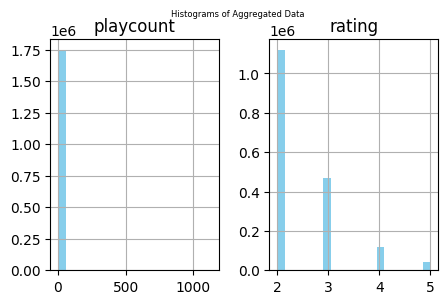

In [17]:
# Plotting histograms for each column
aggregated_data.hist(bins=20, figsize=(5, 3), color='skyblue')
plt.suptitle("Histograms of Aggregated Data", fontsize=6)
plt.show()

In [18]:

#  Create the user-item matrix as a sparse matrix
user_item_matrix_sparse = csr_matrix(pd.pivot_table(
    aggregated_data, index='user_id', columns='track_id', values='rating').fillna(0).values)

print(user_item_matrix_sparse)

#  Save the sparse matrix to disk using pickle
with open('user_item_matrix_sparse.pkl', 'wb') as f:
    pickle.dump(user_item_matrix_sparse, f)

# Load the sparse matrix from disk
# with open('user_item_matrix_sparse.pkl', 'rb') as f:
#     user_item_matrix_sparse = pickle.load(f)



  (0, 368)	3.0
  (0, 589)	2.0
  (0, 907)	2.0
  (0, 1095)	2.0
  (0, 1478)	2.0
  (0, 1604)	2.0
  (0, 1724)	4.0
  (0, 1926)	3.0
  (0, 2052)	2.0
  (0, 2057)	2.0
  (0, 2108)	2.0
  (0, 3068)	2.0
  (0, 3291)	2.0
  (0, 3348)	2.0
  (0, 3988)	2.0
  (0, 4084)	3.0
  (0, 4091)	2.0
  (0, 4577)	2.0
  (0, 5347)	2.0
  (0, 5747)	3.0
  (0, 5797)	2.0
  (0, 6820)	2.0
  (0, 7472)	2.0
  (0, 7965)	2.0
  (0, 8043)	2.0
  :	:
  (22732, 15082)	2.0
  (22732, 16109)	2.0
  (22732, 17084)	2.0
  (22732, 17688)	2.0
  (22732, 18070)	2.0
  (22732, 18620)	2.0
  (22732, 18697)	2.0
  (22732, 19000)	2.0
  (22732, 19486)	2.0
  (22732, 19848)	2.0
  (22732, 20836)	2.0
  (22732, 21498)	2.0
  (22732, 21587)	3.0
  (22732, 21658)	2.0
  (22732, 22108)	2.0
  (22732, 22992)	3.0
  (22732, 23149)	3.0
  (22732, 24374)	2.0
  (22732, 24574)	3.0
  (22732, 24602)	2.0
  (22732, 24900)	2.0
  (22732, 25059)	2.0
  (22732, 25089)	3.0
  (22732, 25756)	2.0
  (22732, 26244)	2.0


## Cosine Similarity

In [19]:
#  Compute cosine similarity between users using sparse matrix
user_similarity = cosine_similarity(user_item_matrix_sparse)

# Convert the similarity matrix to a DataFrame for easier manipulation
user_similarity_df = pd.DataFrame(user_similarity)

In [20]:
user_similarity_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22723,22724,22725,22726,22727,22728,22729,22730,22731,22732
0,1.000000,0.000000,0.061930,0.000000,0.037140,0.079836,0.000000,0.000000,0.008354,0.015679,...,0.014073,0.000000,0.000000,0.000000,0.000000,0.022969,0.017376,0.000000,0.000000,0.089482
1,0.000000,1.000000,0.009498,0.011612,0.000000,0.069885,0.013920,0.010914,0.016657,0.039076,...,0.018707,0.000000,0.000000,0.031435,0.046447,0.000000,0.011549,0.028389,0.000000,0.013216
2,0.061930,0.009498,1.000000,0.000000,0.037262,0.000000,0.000000,0.000000,0.067697,0.036300,...,0.010861,0.045321,0.303323,0.020279,0.040450,0.021272,0.000000,0.006279,0.008112,0.010231
3,0.000000,0.011612,0.000000,1.000000,0.000000,0.000000,0.160720,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010929,0.007676,0.054540,0.000000
4,0.037140,0.000000,0.037262,0.000000,1.000000,0.014059,0.003361,0.013174,0.043563,0.000000,...,0.016935,0.017667,0.000000,0.006324,0.000000,0.013820,0.038334,0.047729,0.006324,0.019940
5,0.079836,0.069885,0.000000,0.000000,0.014059,1.000000,0.000000,0.010361,0.021083,0.041215,...,0.029596,0.000000,0.010860,0.000000,0.126761,0.023186,0.051159,0.000000,0.000000,0.069000
6,0.000000,0.013920,0.000000,0.160720,0.003361,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.004245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003681,0.007133,0.000000
7,0.000000,0.010914,0.000000,0.000000,0.013174,0.010361,0.000000,1.000000,0.051860,0.000000,...,0.049921,0.000000,0.000000,0.000000,0.020658,0.032591,0.041091,0.000000,0.018642,0.011756
8,0.008354,0.016657,0.067697,0.000000,0.043563,0.021083,0.000000,0.051860,1.000000,0.033008,...,0.053966,0.059099,0.071183,0.039119,0.031527,0.094296,0.147633,0.016517,0.007113,0.046349
9,0.015679,0.039076,0.036300,0.000000,0.000000,0.041215,0.000000,0.000000,0.033008,1.000000,...,0.031774,0.082228,0.077726,0.008899,0.000000,0.112793,0.000000,0.000000,0.000000,0.016836


In [21]:
#Create an index map from the user_id to numerical indices
user_index_map = {user_id: idx for idx, user_id in enumerate(aggregated_data['user_id'].unique())}

In [22]:
# Update the get_recommendations function to use indices
def get_recommendations(user_id, n_recommendations=10):
    # Map user_id to the corresponding index
    user_idx = user_index_map.get(user_id, None)

    #already_listened_songs = aggregated_data[aggregated_data['user_id'] == similar_user_id]

    if user_idx is None:
        print(f"User ID {user_id} not found.")
        return []

    similar_users = user_similarity_df.iloc[user_idx].sort_values(ascending=False)[1:]  # Exclude the user itself
    top_similar_users = similar_users.index[:n_recommendations]

    recommendations = []
    for similar_user in top_similar_users:
        similar_user_id = aggregated_data['user_id'].unique()[similar_user]  # Get the actual user ID
        similar_user_song = aggregated_data[aggregated_data['user_id'] == similar_user_id].tail(1)  # get the latest song of each user
        recommended_songs = similar_user_song['track_id'].tolist()
        recommendations.extend(recommended_songs)

    return list(set(recommendations))

In [23]:
#  Get recommendations for a specific user
user_id = aggregated_data['user_id'].iloc[100]  # Replace with actual user ID
recommendations = get_recommendations(user_id)
print(f"Recommendations for user {user_id}: {recommendations}")

Recommendations for user 00043d7bc800ceff4a90459e189eba5d442a1d3d: ['TRZRBGU128F423BB12', 'TRZYAGJ128F9332CEF', 'TRZPDFG128F92FDEF5', 'TRZXGMH12903CE297D', 'TRZQLHL128F92EB2D5', 'TRZWTOU12903CE450A', 'TRZRJRP128F146A43A', 'TRZXJNZ128F14A94EA', 'TRZIVHZ128F1465262', 'TRZQTSF128F424FE70']


Save for later otherwise we wud hv to use TPU always

In [24]:
# Save the user_similarity_df as a CSV file
# user_similarity_df.to_csv('user_similarity.csv', index=False)

# Save the dictionary as a pickle file
with open('user_index_map.pkl', 'wb') as f:
    pickle.dump(user_index_map, f)

## To update the model

In [25]:
new_interactions = aggregated_data.copy().drop("rating", axis=1).sample(frac=0.05, random_state=42).reset_index(drop=True) # just an example for the demonstration

In [26]:
new_interactions.head(5)

,user_id,track_id,playcount
0,fdb43c586e55e1223e4bfa7fb2ddd4b1bbfe1e5c,TRHZSRQ128F429EB40,1.0
1,304380cb2219a154d24fe75f007ef1762ac3b651,TRKTQDC128F92EA2B4,5.0
2,88355a5614acfcc528a4e6242dfd58645da8cc44,TRACTTC128F42370D9,2.0
3,88fd12690b2620c0c4d59274d0b4e8988ba99b97,TRQLWDC128F42396CF,2.0
4,75410cecb767aae1ba0b1ee04972b53b104b8308,TRUPYUP12903D0FA06,3.0


In [27]:
# Merge df1 and df2 using a left join on 'track_id' and 'user_id'
merged_df = pd.merge(aggregated_data, new_interactions, on=['track_id', 'user_id'], how='left', suffixes=('_df1', '_df2'))

# Define the custom aggregation function
def custom_agg_function(row):
    # If playcount from df2 is NaN, keep the value from df1
    if pd.isna(row['playcount_df2']):
        return row['playcount_df1']
    # If playcount from df1 is NaN, keep the value from df2
    if pd.isna(row['playcount_df1']):
        return row['playcount_df2']
    # Otherwise, apply the custom formula
    return (row['playcount_df1'] * 3 + row['playcount_df2']) / 4

# Apply the custom aggregation function row-wise
merged_df['playcount'] = merged_df.apply(custom_agg_function, axis=1)

# Create the final dataframe with track_id, user_id, and the new playcount
final_df = merged_df[['track_id', 'user_id', 'playcount']]

In [29]:
final_df['rating'] = final_df['playcount'].apply(convert_to_rating)

<ipython-input-29-3dc4965a3711>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['rating'] = final_df['playcount'].apply(convert_to_rating)


In [30]:
# Output the final dataframe
print(final_df)

                   track_id                                   user_id  \
0        TRAFUNV128F92CFEB2  0003a64f7a69e5b87a80b09c3772227185c235c7   
1        TRAKKTI128F42B4F25  0003a64f7a69e5b87a80b09c3772227185c235c7   
2        TRARTEH128F423DBC1  0003a64f7a69e5b87a80b09c3772227185c235c7   
3        TRAVRKY128F429EA68  0003a64f7a69e5b87a80b09c3772227185c235c7   
4        TRBFKOV128F426DDF1  0003a64f7a69e5b87a80b09c3772227185c235c7   
...                     ...                                       ...   
1745807  TRYDVHI128F93268D6  ffffcfeb0c1b66bd212ea58d918c7dc62fb9c3a5   
1745808  TRYHSFE128F429EA71  ffffcfeb0c1b66bd212ea58d918c7dc62fb9c3a5   
1745809  TRYIKBI128F426FFF2  ffffcfeb0c1b66bd212ea58d918c7dc62fb9c3a5   
1745810  TRZALGW128F4296174  ffffcfeb0c1b66bd212ea58d918c7dc62fb9c3a5   
1745811  TRZPVLJ128F148D2F7  ffffcfeb0c1b66bd212ea58d918c7dc62fb9c3a5   

         playcount  rating  
0              2.0       3  
1              1.0       2  
2              1.0       2  
3      

In [31]:

#  Create the user-item matrix as a sparse matrix
user_item_matrix_sparse_new = csr_matrix(pd.pivot_table(
    final_df, index='user_id', columns='track_id', values='rating').fillna(0).values)

print(user_item_matrix_sparse_new)

#  Save the sparse matrix to disk using pickle
with open('user_item_matrix_sparse_new.pkl', 'wb') as f:
    pickle.dump(user_item_matrix_sparse_new, f)

# Load the sparse matrix from disk
# with open('user_item_matrix_sparse.pkl', 'rb') as f:
#     user_item_matrix_sparse = pickle.load(f)



  (0, 368)	3.0
  (0, 589)	2.0
  (0, 907)	2.0
  (0, 1095)	2.0
  (0, 1478)	2.0
  (0, 1604)	2.0
  (0, 1724)	4.0
  (0, 1926)	3.0
  (0, 2052)	2.0
  (0, 2057)	2.0
  (0, 2108)	2.0
  (0, 3068)	2.0
  (0, 3291)	2.0
  (0, 3348)	2.0
  (0, 3988)	2.0
  (0, 4084)	3.0
  (0, 4091)	2.0
  (0, 4577)	2.0
  (0, 5347)	2.0
  (0, 5747)	3.0
  (0, 5797)	2.0
  (0, 6820)	2.0
  (0, 7472)	2.0
  (0, 7965)	2.0
  (0, 8043)	2.0
  :	:
  (22732, 15082)	2.0
  (22732, 16109)	2.0
  (22732, 17084)	2.0
  (22732, 17688)	2.0
  (22732, 18070)	2.0
  (22732, 18620)	2.0
  (22732, 18697)	2.0
  (22732, 19000)	2.0
  (22732, 19486)	2.0
  (22732, 19848)	2.0
  (22732, 20836)	2.0
  (22732, 21498)	2.0
  (22732, 21587)	3.0
  (22732, 21658)	2.0
  (22732, 22108)	2.0
  (22732, 22992)	3.0
  (22732, 23149)	3.0
  (22732, 24374)	2.0
  (22732, 24574)	3.0
  (22732, 24602)	2.0
  (22732, 24900)	2.0
  (22732, 25059)	2.0
  (22732, 25089)	3.0
  (22732, 25756)	2.0
  (22732, 26244)	2.0


In [32]:
#  Compute cosine similarity between users using sparse matrix
user_similarity_new = cosine_similarity(user_item_matrix_sparse_new)

# Convert the similarity matrix to a DataFrame for easier manipulation
user_similarity_new_df = pd.DataFrame(user_similarity_new)

In [33]:
#Create an index map from the user_id to numerical indices
user_index_map_new = {user_id: idx for idx, user_id in enumerate(final_df['user_id'].unique())}